In [2]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('../data/clean_data.csv')

In [80]:
df

,Unnamed: 0,Species,Strain,Samples,Ethyl Acetate,Ethanol,"Propanoic acid, ethyl ester",2-Pentanone,Decane,Methyl Isobutyl Ketone,...,1-Dodecanol,Methyl tetradecanoate,2-Pentadecanone,"Tetradecanoic acid, ethyl ester",Hexadecanal,n-Tridecan-1-ol,1-Tetradecanol,n-Pentadecanol,1-Hexadecanol,Indole
0,1,SA,SA_A,SA.A_TSB_A,465374,1027715,0,1289650,800581,324424,...,0,0,0,0,0,0,0,0,0,0
1,2,SA,SA_A,SA.A_TSB_B,193151,1050974,0,504113,294680,189630,...,0,0,0,0,0,0,0,0,0,0
2,3,SA,SA_A,SA.A_TSB_C,403286,1850391,0,1169501,15,228163,...,0,0,0,0,0,0,0,0,0,0
3,4,SA,SA_A,SA.A_TSB_D,129833,5140770,0,1926072,124282,0,...,0,0,0,0,0,0,0,0,0,0
4,5,SA,SA_A,SA.A_TSB_E,117105,3422557,0,246751,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,80,EC,EC_B,EC.B_TSB_A,119313,1364553,0,169495,0,0,...,289615,0,0,0,0,0,0,0,0,60325589
80,81,EC,EC_B,EC.B_TSB_B,128397,1451138,0,359499,0,0,...,749942,0,0,0,0,0,78672,0,0,107880324
81,82,EC,EC_B,EC.B_TSB_C,309004,5650813,0,875905,0,0,...,479315,0,0,0,0,0,84426,0,0,72102392
82,83,EC,EC_B,EC.B_TSB_D,548442,3588158,0,637563,0,0,...,2750809,0,0,0,0,0,146349,0,0,85257546


In [81]:
df.describe()

,Unnamed: 0,Ethyl Acetate,Ethanol,"Propanoic acid, ethyl ester",2-Pentanone,Decane,Methyl Isobutyl Ketone,Amylene hydrate,"Butanoic acid, 2-methyl-, methyl ester",Isobutyl acetate,...,1-Dodecanol,Methyl tetradecanoate,2-Pentadecanone,"Tetradecanoic acid, ethyl ester",Hexadecanal,n-Tridecan-1-ol,1-Tetradecanol,n-Pentadecanol,1-Hexadecanol,Indole
count,84.000000,8.400000e+01,8.400000e+01,84.000000,8.400000e+01,8.400000e+01,8.400000e+01,84.000000,8.400000e+01,84.000000,...,8.400000e+01,84.000000,84.000000,84.000000,84.000000,84.000000,8.400000e+01,8.400000e+01,8.400000e+01,8.400000e+01
mean,42.500000,2.036490e+05,2.028525e+06,5782.309524,1.064872e+06,2.768394e+05,1.480613e+05,86875.857143,9.232962e+04,29581.845238,...,6.746086e+05,31460.892857,27563.583333,3268.202381,30265.511905,27508.380952,1.883707e+05,5.355926e+04,2.128250e+05,2.650791e+07
std,24.392622,3.002189e+05,2.590197e+06,27125.922554,1.005756e+06,4.261672e+05,3.360538e+05,150817.542074,2.878601e+05,72069.016020,...,1.526756e+06,110105.503047,66499.751208,17585.417257,100657.405300,83558.369196,4.141798e+05,2.594242e+05,6.134696e+05,4.067477e+07
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,21.750000,0.000000e+00,0.000000e+00,0.000000,4.407430e+05,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,42.500000,8.781000e+04,1.032814e+06,0.000000,6.556720e+05,3.304850e+04,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,63.250000,2.661052e+05,3.060331e+06,0.000000,1.405165e+06,4.603455e+05,0.000000e+00,112542.750000,0.000000e+00,0.000000,...,6.850748e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1.589658e+05,0.000000e+00,1.292200e+04,7.229028e+07
max,84.000000,1.335746e+06,1.073959e+07,175461.000000,4.593791e+06,2.992449e+06,1.309090e+06,759098.000000,1.437190e+06,381024.000000,...,8.172616e+06,698476.000000,382222.000000,119785.000000,652645.000000,448151.000000,2.450605e+06,1.869692e+06,4.268126e+06,1.127007e+08


In [82]:
df["Samples "] = df["Samples "].str.slice(-1,)

In [59]:
# Labels are the values we want to predict
labels = np.array(df['Samples '])
# Remove the labels from the features
# axis 1 refers to the columns
df = df.drop(['Strain', 'Samples ', 'Species', 'Unnamed: 0'], axis = 1)
#df = df.drop([df.columns[0]])



In [60]:
df

,Ethyl Acetate,Ethanol,"Propanoic acid, ethyl ester",2-Pentanone,Decane,Methyl Isobutyl Ketone,Amylene hydrate,"Butanoic acid, 2-methyl-, methyl ester",Isobutyl acetate,Methyl isovalerate,...,1-Dodecanol,Methyl tetradecanoate,2-Pentadecanone,"Tetradecanoic acid, ethyl ester",Hexadecanal,n-Tridecan-1-ol,1-Tetradecanol,n-Pentadecanol,1-Hexadecanol,Indole
0,465374,1027715,0,1289650,800581,324424,73015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,193151,1050974,0,504113,294680,189630,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,403286,1850391,0,1169501,15,228163,73558,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,129833,5140770,0,1926072,124282,0,188367,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,117105,3422557,0,246751,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,119313,1364553,0,169495,0,0,0,0,0,0,...,289615,0,0,0,0,0,0,0,0,60325589
80,128397,1451138,0,359499,0,0,0,0,0,0,...,749942,0,0,0,0,0,78672,0,0,107880324
81,309004,5650813,0,875905,0,0,109170,0,0,0,...,479315,0,0,0,0,0,84426,0,0,72102392
82,548442,3588158,0,637563,0,0,60834,0,0,0,...,2750809,0,0,0,0,0,146349,0,0,85257546


In [61]:
# Saving feature names for later use
feature_list = list(df.columns)
# Convert to numpy array
df = np.array(df)

In [62]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(df, labels, test_size = 0.25, random_state = 42)

In [63]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (63, 67)
Training Labels Shape: (63,)
Testing Features Shape: (21, 67)
Testing Labels Shape: (21,)


In [64]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)
rf.score(test_features, test_labels)

0.0

In [65]:
param_grid = {
    'n_estimators': [180, 200, 250, 300 , 350, 400, 500, 1000],
    'max_depth': [6, 10, 20, 30]
}
gridsearch = GridSearchCV(RandomForestClassifier(n_jobs = -1), 
                          param_grid=param_grid, 
                          scoring='accuracy', cv=3, 
                          return_train_score=True, verbose=10)
gridsearch.fit(train_features, train_labels)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3; 1/32] START max_depth=6, n_estimators=180..............................
[CV 1/3; 1/32] END max_depth=6, n_estimators=180;, score=(train=1.000, test=0.190) total time=   2.7s
[CV 2/3; 1/32] START max_depth=6, n_estimators=180..............................
[CV 2/3; 1/32] END max_depth=6, n_estimators=180;, score=(train=1.000, test=0.190) total time=   0.4s
[CV 3/3; 1/32] START max_depth=6, n_estimators=180..............................
[CV 3/3; 1/32] END max_depth=6, n_estimators=180;, score=(train=1.000, test=0.095) total time=   0.4s
[CV 1/3; 2/32] START max_depth=6, n_estimators=200..............................
[CV 1/3; 2/32] END max_depth=6, n_estimators=200;, score=(train=1.000, test=0.286) total time=   0.4s
[CV 2/3; 2/32] START max_depth=6, n_estimators=200..............................
[CV 2/3; 2/32] END max_depth=6, n_estimators=200;, score=(train=1.000, test=0.190) total time=   0.5s
[CV 3/3; 2/32] START max

[CV 3/3; 15/32] END max_depth=10, n_estimators=500;, score=(train=1.000, test=0.143) total time=   0.8s
[CV 1/3; 16/32] START max_depth=10, n_estimators=1000...........................
[CV 1/3; 16/32] END max_depth=10, n_estimators=1000;, score=(train=1.000, test=0.286) total time=   2.0s
[CV 2/3; 16/32] START max_depth=10, n_estimators=1000...........................
[CV 2/3; 16/32] END max_depth=10, n_estimators=1000;, score=(train=1.000, test=0.190) total time=   1.5s
[CV 3/3; 16/32] START max_depth=10, n_estimators=1000...........................
[CV 3/3; 16/32] END max_depth=10, n_estimators=1000;, score=(train=1.000, test=0.143) total time=   1.8s
[CV 1/3; 17/32] START max_depth=20, n_estimators=180............................
[CV 1/3; 17/32] END max_depth=20, n_estimators=180;, score=(train=1.000, test=0.238) total time=   0.5s
[CV 2/3; 17/32] START max_depth=20, n_estimators=180............................
[CV 2/3; 17/32] END max_depth=20, n_estimators=180;, score=(train=1.000,

[CV 3/3; 30/32] END max_depth=30, n_estimators=400;, score=(train=1.000, test=0.048) total time=   0.6s
[CV 1/3; 31/32] START max_depth=30, n_estimators=500............................
[CV 1/3; 31/32] END max_depth=30, n_estimators=500;, score=(train=1.000, test=0.286) total time=   0.6s
[CV 2/3; 31/32] START max_depth=30, n_estimators=500............................
[CV 2/3; 31/32] END max_depth=30, n_estimators=500;, score=(train=1.000, test=0.143) total time=   0.6s
[CV 3/3; 31/32] START max_depth=30, n_estimators=500............................
[CV 3/3; 31/32] END max_depth=30, n_estimators=500;, score=(train=1.000, test=0.095) total time=   0.8s
[CV 1/3; 32/32] START max_depth=30, n_estimators=1000...........................
[CV 1/3; 32/32] END max_depth=30, n_estimators=1000;, score=(train=1.000, test=0.286) total time=   1.7s
[CV 2/3; 32/32] START max_depth=30, n_estimators=1000...........................
[CV 2/3; 32/32] END max_depth=30, n_estimators=1000;, score=(train=1.000, 

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [6, 10, 20, 30],
                         'n_estimators': [180, 200, 250, 300, 350, 400, 500,
                                          1000]},
             return_train_score=True, scoring='accuracy', verbose=10)

In [66]:
pd.DataFrame(gridsearch.cv_results_).sort_values( \
                                         by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
4,0.431142,0.022841,0.103259,0.001764,6,350,"{'max_depth': 6, 'n_estimators': 350}",0.285714,0.190476,0.190476,0.222222,0.044896,1,1.0,1.0,1.0,1.0,0.0
15,1.512307,0.146849,0.247303,0.050669,10,1000,"{'max_depth': 10, 'n_estimators': 1000}",0.285714,0.190476,0.142857,0.206349,0.059391,2,1.0,1.0,1.0,1.0,0.0
1,0.323479,0.022179,0.111186,0.003864,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.285714,0.190476,0.142857,0.206349,0.059391,2,1.0,1.0,1.0,1.0,0.0
7,1.141652,0.041787,0.208709,0.000842,6,1000,"{'max_depth': 6, 'n_estimators': 1000}",0.285714,0.190476,0.142857,0.206349,0.059391,2,1.0,1.0,1.0,1.0,0.0
11,0.567446,0.067780,0.105846,0.002451,10,300,"{'max_depth': 10, 'n_estimators': 300}",0.285714,0.142857,0.190476,0.206349,0.059391,2,1.0,1.0,1.0,1.0,0.0
28,0.733057,0.225921,0.105857,0.002882,30,350,"{'max_depth': 30, 'n_estimators': 350}",0.285714,0.190476,0.095238,0.190476,0.077762,6,1.0,1.0,1.0,1.0,0.0
26,0.539813,0.113539,0.108753,0.003678,30,250,"{'max_depth': 30, 'n_estimators': 250}",0.285714,0.190476,0.095238,0.190476,0.077762,6,1.0,1.0,1.0,1.0,0.0
23,1.444956,0.169005,0.206417,0.004087,20,1000,"{'max_depth': 20, 'n_estimators': 1000}",0.285714,0.190476,0.095238,0.190476,0.077762,6,1.0,1.0,1.0,1.0,0.0
21,0.430176,0.010232,0.103396,0.000411,20,400,"{'max_depth': 20, 'n_estimators': 400}",0.285714,0.190476,0.095238,0.190476,0.077762,6,1.0,1.0,1.0,1.0,0.0
20,0.417926,0.026825,0.103449,0.001351,20,350,"{'max_depth': 20, 'n_estimators': 350}",0.285714,0.190476,0.095238,0.190476,0.077762,6,1.0,1.0,1.0,1.0,0.0


In [67]:
rf = RandomForestClassifier(max_depth = 6, n_estimators = 350, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)
rf.score(test_features, test_labels)

0.047619047619047616

In [70]:
df


array([[  465374,  1027715,        0, ...,        0,        0,        0],
       [  193151,  1050974,        0, ...,        0,        0,        0],
       [  403286,  1850391,        0, ...,        0,        0,        0],
       ...,
       [  309004,  5650813,        0, ...,        0,        0, 72102392],
       [  548442,  3588158,        0, ...,        0,        0, 85257546],
       [  339404,  3962927,        0, ...,        0,   482026, 97156549]])

In [71]:
df1 = df.transpose()

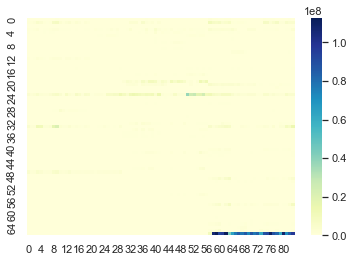

In [72]:

import seaborn as sns; sns.set_theme()
ax = sns.heatmap(df1, cmap="YlGnBu")

In [84]:
df2 = df.groupby(by="Samples ").sum()
df2

,Unnamed: 0,Ethyl Acetate,Ethanol,"Propanoic acid, ethyl ester",2-Pentanone,Decane,Methyl Isobutyl Ketone,Amylene hydrate,"Butanoic acid, 2-methyl-, methyl ester",Isobutyl acetate,...,1-Dodecanol,Methyl tetradecanoate,2-Pentadecanone,"Tetradecanoic acid, ethyl ester",Hexadecanal,n-Tridecan-1-ol,1-Tetradecanol,n-Pentadecanol,1-Hexadecanol,Indole
Samples,,,,,,,,,,,,,,,,,,,,,
A,751,4427037,33354592,127719,26356429,7895576,3680461,2416886,1205167,994856,...,5276811,73677,119213,0,89948,342680,2461700,247622,2055406,391328483
B,769,4332516,34487167,99116,19134821,4121845,3476116,1569950,1718440,396613,...,11674946,607828,447391,0,522771,649241,3068473,442536,2137140,580423873
C,787,4537781,32212824,83418,20782983,5914042,3344354,1419149,2199729,827259,...,17184650,825856,622923,154744,911327,679735,3859912,470038,2790360,500376938
D,682,2289963,38802699,175461,13608523,4209687,1936216,646552,1940478,69547,...,10638435,190524,387548,119785,766253,325012,3712895,1469090,6187396,428383808
E,581,1519222,31538785,0,9566499,1113359,0,1245035,691874,196600,...,11892284,944830,738266,0,252004,314036,2720162,1869692,4706994,326151599


In [89]:
df2t = df2.transpose()

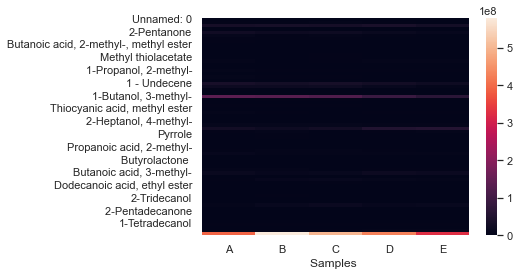

In [86]:

ax = sns.heatmap(df2t)

[(0.0, 180000000.0)]

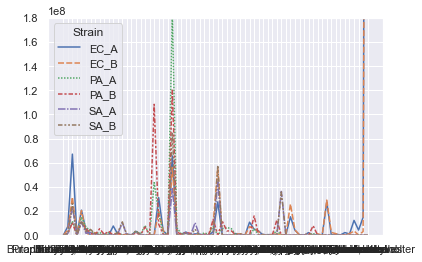

In [76]:
ax = sns.lineplot(data=df2t)
ax.set(ylim=(0, 180000000))

In [90]:
#dftemp = df2t.drop(['Indole', 'Unnamed: 0'], axis = 0)
dftemp = df2t.drop(['Unnamed: 0'], axis = 0)

#print(df2t.columns)

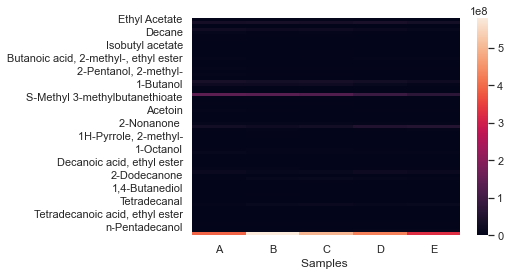

In [91]:
ax = sns.heatmap(dftemp)